# Model Reproducibility

In this notebook I will reproduce one of the examples from the publication associated to the model and make sure the Ersilia Model Hub implementation is giving the same results.
The test is explained in the ReadMe File

In [31]:
# In this codeblock I will import the necessary packages and specify the paths to relevant folders

%matplotlib inline

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import sys
sys.path.append('../src')
import os


DATAPATH = "../data"

In [2]:
# In this codeblock I will load the predictions obtained from the original author's code implementation from the /data folder

author_prediction = pd.read_csv(os.path.join(DATAPATH, "EX3_Author_pred.csv"))
author_prediction

,id,smiles,label,score,alea,epis
0,Ex_1,O=C(CCC[N+]1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,1,0.992492,0.007384,6.715052e-05
1,Ex_2,CCC[N+]1C[C@H](CSC)C[C@@H]2c3cccc4c3C(C=N4)C[C...,1,0.981772,0.017302,5.942002e-04
2,Ex_3,CC(C)(C)c1ccc(C(=O)CCC[N+]2CCC(OC(c3ccccc3)c3c...,1,0.988027,0.011730,9.883803e-05
3,Ex_4,CC(C)COC[C@@H](CN(Cc1ccccc1)c1ccccc1)[N+]1CCCC1,1,0.950828,0.044043,2.711584e-03
4,Ex_5,C[N+]1[C@H]2CC[C@@H]1C[C@H](OC(=O)C(CO)c1ccccc...,1,0.594851,0.155958,8.504483e-02
5,Ex_6,C=C[C@H]1C[N+]2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc...,0,0.616082,0.192983,4.354152e-02
6,Ex_7,C[N+]1CC[N+](CCCCN2C(=O)CN(N=Cc3ccc(-c4ccc(Cl)...,0,0.522216,0.205612,4.389427e-02
7,Ex_8,C[N+](C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,0,0.980107,0.019193,3.045282e-04
8,Ex_9,CCC(=O)N(c1ccccc1)C1CC[N+](CCc2ccccc2)CC1,0,0.837923,0.117601,1.820644e-02
9,Ex_10,O[C@@H](c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)[C@...,0,0.758832,0.145894,3.711259e-02


According to the scientific publication as shown in bayesherg_supplementary_tables_bbac211, Table S15. The external set 3 contain

positive = 11
negative = 30

The author result is in the next Table S16 with Acc = 0.707

In [32]:
# In this codeblock I will recreate the figure or value I am to reproduce, for example an AUROC
y_true = np.repeat([1, 0], repeats=[11, 30])
y_pred = author_prediction["label"]
acc = accuracy_score(y_true, y_pred)
acc

0.7073170731707317

In [3]:
# In this codeblock I will load the predictions obtained from the Ersilia Model Hub implementation saved in the /data folder

hub_prediction = pd.read_csv(os.path.join(DATAPATH, "eos4tcc_EX3output.csv"))
hub_prediction

,key,input,score,alea,epis
0,ICMLRJJLJVVQGT-UHFFFAOYSA-N,O=C(CCC[N+]1CCC(O)(c2ccc(Cl)cc2)CC1)c1ccc(F)cc1,0.176129,0.118548,0.026560
1,BLUAASNRIJJGKL-RILYDNKNSA-N,CCC[N+]1C[C@H](CSC)C[C@@H]2c3cccc4c3C(C=N4)C[C...,0.159992,0.112075,0.022319
2,YPYUSOLNFCETJV-UHFFFAOYSA-N,CC(C)(C)c1ccc(C(=O)CCC[N+]2CCC(OC(c3ccccc3)c3c...,0.165378,0.121552,0.016477
3,FLEJZHACHXCVCS-XMMPIXPASA-N,CC(C)COC[C@@H](CN(Cc1ccccc1)c1ccccc1)[N+]1CCCC1,0.166052,0.109764,0.028715
4,ZVPJDRRWMYGYKM-SPUOUPEWSA-N,C[N+]1[C@H]2CC[C@@H]1C[C@H](OC(=O)C(CO)c1ccccc...,0.170607,0.113120,0.028380
5,LCZKRPAXTKFXKO-LHHVKLHASA-N,C=C[C@H]1C[N+]2CC[C@H]1C[C@@H]2[C@@H](O)c1ccnc...,0.187344,0.109871,0.042375
6,LMNFBJVBICKILT-UHFFFAOYSA-N,C[N+]1CC[N+](CCCCN2C(=O)CN(N=Cc3ccc(-c4ccc(Cl)...,0.152254,0.102579,0.026494
7,MOFWZSVBZGBGFQ-UHFFFAOYSA-N,C[N+](C)CCCN1c2ccccc2Sc2ccc(Cl)cc21,0.169176,0.115744,0.024811
8,KZTVAPPFRZPMJA-UHFFFAOYSA-N,CCC(=O)N(c1ccccc1)C1CC[N+](CCc2ccccc2)CC1,0.165426,0.109789,0.028271
9,BQMMQFOHWIHDTD-DOMZBBRYSA-N,O[C@@H](c1cc(C(F)(F)F)nc2c(C(F)(F)F)cccc12)[C@...,0.165169,0.107441,0.030448


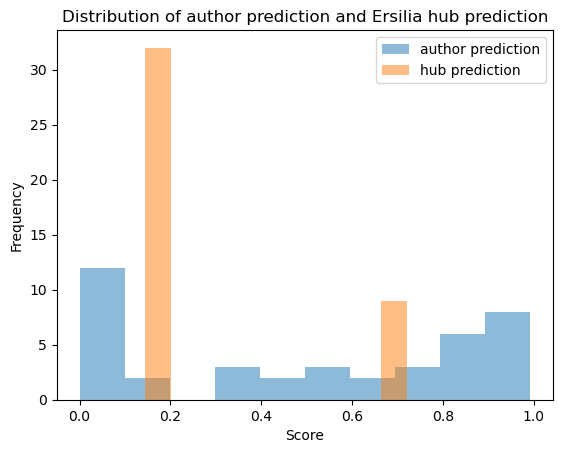

In [38]:
# In this codeblock I will compare the orginal implementation vs the EMH result
# Create histograms
fig = plt.figure()
plt.hist(author_prediction["score"], bins=10, alpha=0.5, label='author prediction')
plt.hist(hub_prediction["score"], bins=10, alpha=0.5, label='hub prediction')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title("Distribution of author prediction and Ersilia hub prediction")

# Add legend
plt.legend()

# Show the plot
plt.show()

In [37]:
output_directory = "../Figures"

fig.savefig(os.path.join(output_directory, 'Distribution of author prediction and Ersilia hub prediction.png'))

in the above graph, it is visible that prediction gotten from Ersilia model hub is different from the predictions gotten from the original implementation. This shows the prediction scores are not reliable because they are not reproducible.